# Capstone 1 - Data Story

This document will analyze various factors of interest in the dataset. 

In [5]:
#initial load
# Import pandas for data processing
import pandas as pd

# Import matplotlib for visualizations
import matplotlib.pyplot as plt

#Import seaborn and numpy for more visualizations and correlation
import seaborn as sb
import numpy as np

#Import Regex to fix the duration and idle time fields
import re

# Load the data into a dataframe
driverBehavior = pd.read_csv("Behavior09012016.csv")

# Checkout the data
driverBehavior.head()
driverBehavior.shape
driverBehavior.info()

#Note that column descriptions are in the "readme" file on github. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 23 columns):
Name                212 non-null object
Overall Score       212 non-null float64
Miles               212 non-null float64
Duration            212 non-null object
Highway %           212 non-null int64
City %              212 non-null int64
Idle Time           212 non-null object
Idling %            212 non-null float64
Idling Score        212 non-null float64
Speeding Score      212 non-null int64
Highway 1-5 %       212 non-null int64
Highway 6-10 %      212 non-null int64
Highway 11-14 %     212 non-null int64
Highway 15+ %       212 non-null int64
Highway Score       212 non-null int64
City 1-5 %          212 non-null int64
City 6-10 %         212 non-null int64
City 11-14 %        212 non-null int64
City 15+ %          212 non-null int64
City Score          212 non-null int64
Acceleration        212 non-null int64
Braking             212 non-null int64
Aggression Score    212 no

# Frequency of Driver Safety Behavior Events

	As shown in the following histograms, driver safety violations are relatively rate, though there are certain employees who rack up quite a number of them. 
	We can also check the "aggression score", the score that the GPS software calculates, to find any outliers in that measurement. Keep in mind that this score is graded with 100 being the highest, while 0 being the lowest. Sure enough, someone scored only a 40! 
    This is somewhat good news, because it means that relatively few employees are the most hazardous. That means that we can talk to the employees to help curb their behavior. We will also setup email alerts to make sure they are behaving themselves. 


In [19]:
#Max of Acceleration events
max(driverBehavior['Acceleration'])

27

In [22]:
#Min of Acceleration events
min(driverBehavior['Acceleration'])

0

In [20]:
#Max of Braking events
max(driverBehavior['Braking'])

5

In [24]:
#Min of Braking events
min(driverBehavior['Braking'])

0

In [25]:
#Max of Aggression Score
#Low is bad, high is good
max(driverBehavior['Aggression Score'])

100.0

In [21]:
#Min of Aggression Score
#Low is bad, high is good
min(driverBehavior['Aggression Score'])

39.5

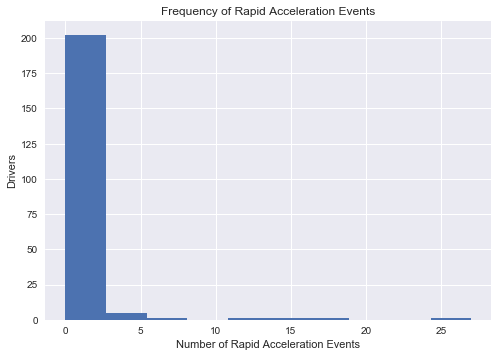

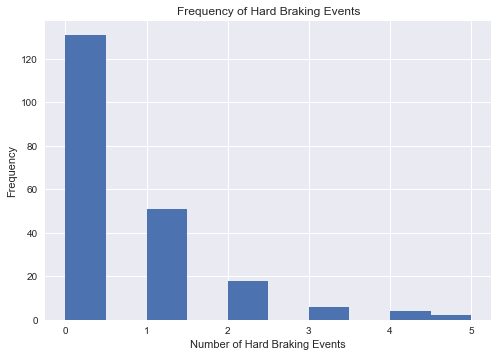

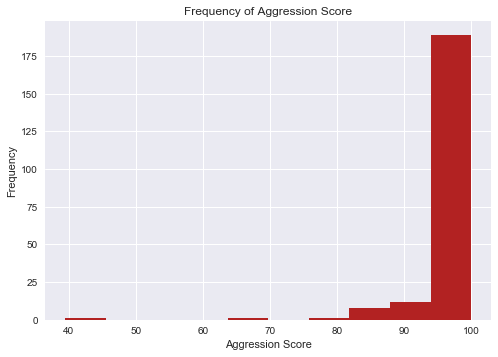

In [6]:
#Rapid Acceleration
figRA=plt.figure()

ax=figRA.add_subplot(1,1,1)
ax.hist(driverBehavior['Acceleration'])

plt.title('Frequency of Rapid Acceleration Events')
plt.xlabel('Number of Rapid Acceleration Events')
plt.ylabel('Drivers')
plt.show()

#Hard Braking
figHB=plt.figure()

ax=figHB.add_subplot(1,1,1)
ax.hist(driverBehavior['Braking'])

plt.title('Frequency of Hard Braking Events')
plt.xlabel('Number of Hard Braking Events')
plt.ylabel('Frequency')
plt.show()

#Aggression Score
figAS=plt.figure()

ax=figAS.add_subplot(1,1,1)
ax.hist(driverBehavior['Aggression Score'], color = 'firebrick')

plt.title('Frequency of Aggression Score')
plt.xlabel('Aggression Score')
plt.ylabel('Frequency')
plt.show()

# Frequency of Miles Driven

	Another interesting breakdown, with most drivers driving less than 2,500 miles – yet one driver logging an incredible 4,814 miles in a month. Most likely, this means that certain drivers have different roles – with some drivers probably driving almost for a living. The company has delivery drivers and they are most likely responsible for the outliers. 

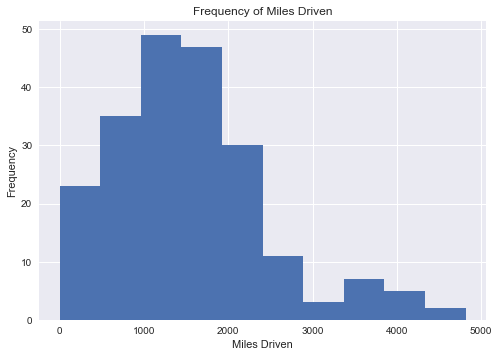

In [7]:
#Miles Driven
figMD=plt.figure()

ax=figMD.add_subplot(1,1,1)
ax.hist(driverBehavior['Miles'])

plt.title('Frequency of Miles Driven')
plt.xlabel('Miles Driven')
plt.ylabel('Frequency')
plt.show()


# Frequency of Idling

    This data is of particular interest as it directly hits the bottom line. There is plenty of room for improvement as many drivers idle quite a bit – hours and hours each month. 
	Consider that one driver spent a staggering 95% of his time idling – almost 11 hours! 
	This is where we can save the most money, as these drivers are burning through fuel idling. The question is – why? 
	By locating the outliers, we can ask them! 
    Also note that some trucks are very rarely used - you can see in the 10 lowest idling list that a few trucks had no use at all during the measurement period. These are trucks that are often used as loaners, spares, or the driver is on vacation. 


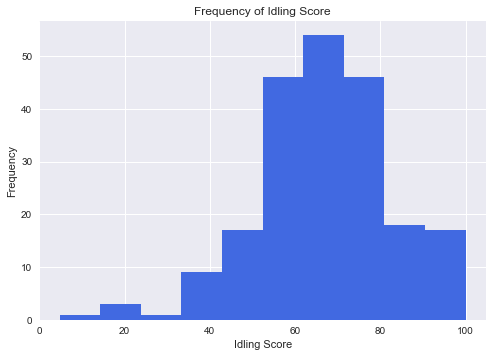

In [8]:
#Idling Score
#Note: idling score is auto calculated by GPS program - 100 is the highest and 0 is the lowest. 
figIS=plt.figure()

ax=figIS.add_subplot(1,1,1)
ax.hist(driverBehavior['Idling Score'], color ='royalblue')

plt.title('Frequency of Idling Score')
plt.xlabel('Idling Score')
plt.ylabel('Frequency')
plt.show()

In [11]:

#Max Idle Percentage
max(driverBehavior['Idling %'])


95.200000000000003

In [15]:
#Idling % - Top 10
driverBehavior.sort_values("Idling %", ascending=False).head(10)

,Name,Overall Score,Miles,Duration,Highway %,City %,Idle Time,Idling %,Idling Score,Speeding Score,...,Highway 15+ %,Highway Score,City 1-5 %,City 6-10 %,City 11-14 %,City 15+ %,City Score,Acceleration,Braking,Aggression Score
0,PJPB,76.2,1.9,11:27,0,0,10:54,95.2,4.8,100,...,0,100,0,0,0,0,100,0,0,100.0
1,JAHU,78.7,0.0,3:45,0,0,3:12,85.3,14.7,100,...,0,100,0,0,0,0,100,0,0,100.0
3,CJBR,79.7,0.1,0:16,0,0,0:13,81.3,18.8,100,...,0,100,0,0,0,0,100,0,0,100.0
5,SPXU,80.8,0.1,0:30,0,0,0:23,76.7,23.3,100,...,0,100,0,0,0,0,100,0,0,100.0
2,QARI,79.1,782.5,111:34:00,0,0,83:09:00,74.5,25.5,100,...,0,100,0,0,0,0,100,0,2,91.1
10,KHFI,84.0,590.8,67:34:00,0,0,43:12:00,63.9,36.1,100,...,0,100,0,0,0,0,100,0,0,100.0
13,QVOD,84.2,1247.4,123:49:00,0,0,78:10:00,63.1,36.9,100,...,0,100,0,0,0,0,100,0,0,100.0
14,RGYU,84.3,1159.5,103:17:00,0,0,64:57:00,62.9,37.1,100,...,0,100,0,0,0,0,100,0,0,100.0
15,ONIZ,84.3,1611.8,116:49:00,0,0,73:10:00,62.6,37.4,100,...,0,100,0,0,0,0,100,0,0,100.0
9,ZLMC,83.9,1107.6,90:38:00,0,0,55:32:00,61.3,38.7,100,...,0,100,0,0,0,0,100,0,1,96.8


In [16]:
#Idling % - Bottom 10
driverBehavior.sort_values("Idling %", ascending=False).tail(10)

,Name,Overall Score,Miles,Duration,Highway %,City %,Idle Time,Idling %,Idling Score,Speeding Score,...,Highway 15+ %,Highway Score,City 1-5 %,City 6-10 %,City 11-14 %,City 15+ %,City Score,Acceleration,Braking,Aggression Score
202,WNWK,98.6,657.8,29:34:00,0,0,1:42,5.7,94.3,100,...,0,100,0,0,0,0,100,0,0,100.0
203,DVEB,98.8,1845.2,51:20:00,0,0,2:33,5.0,95.0,100,...,0,100,0,0,0,0,100,0,0,100.0
204,JTEG,99.0,370.9,13:41,0,0,0:32,3.9,96.1,100,...,0,100,0,0,0,0,100,0,0,100.0
205,VQWZ,99.2,4034.7,101:43:00,0,0,3:18,3.2,96.8,100,...,0,100,0,0,0,0,100,0,0,100.0
206,NNYA,100.0,0.0,0:00,0,0,0:00,0.0,100.0,100,...,0,100,0,0,0,0,100,0,0,100.0
207,UDAO,100.0,1.2,0:10,0,0,0:00,0.0,100.0,100,...,0,100,0,0,0,0,100,0,0,100.0
208,IQWI,100.0,0.0,0:00,0,0,0:00,0.0,100.0,100,...,0,100,0,0,0,0,100,0,0,100.0
209,WRIX,100.0,0.0,0:00,0,0,0:00,0.0,100.0,100,...,0,100,0,0,0,0,100,0,0,100.0
210,NWYQ,100.0,0.0,0:00,0,0,0:00,0.0,100.0,100,...,0,100,0,0,0,0,100,0,0,100.0
211,UTXH,100.0,0.3,0:51,0,0,0:00,0.0,100.0,100,...,0,100,0,0,0,0,100,0,0,100.0


# Correlations

	Another area we want to explore are correlations.
	This chart breaks down the correlations between Miles, braking, Acceleration, idling Score, and Aggression score, to try to find trends between them. In theory, drivers with high idling are also not as safe of drivers. The idea here is that poor drivers have high idling, as well as poor driver safety. Is that the case? 



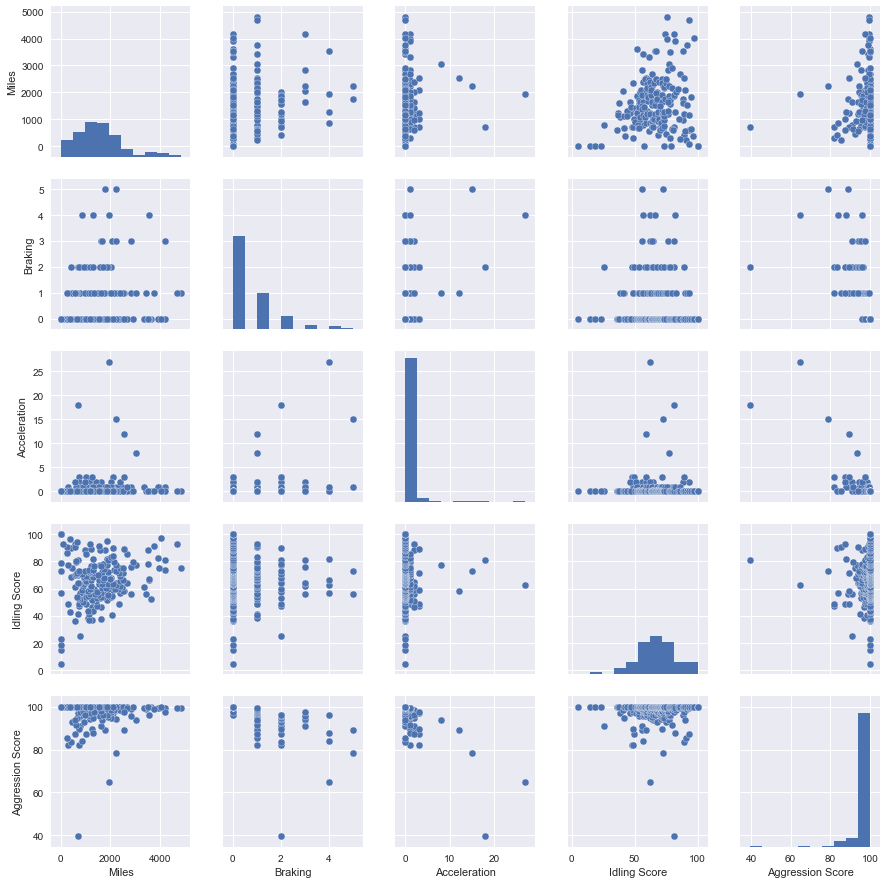

In [40]:
#Pair Lot
sb.pairplot(driverBehavior,vars=["Miles","Braking", "Acceleration", "Idling Score","Aggression Score"])
plt.show()

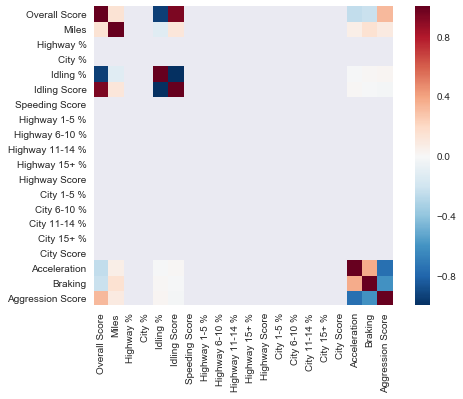

In [43]:
#Heatmap
corrmat = driverBehavior.corr()
sb.heatmap(corrmat, robust=True, square=True)
plt.show()

	There are some correlations here. Higher numbers of acceleration and braking events leads to a lower aggression score - that makes sense as the score is calculated with "100" being the highest and "0" being the lowest. Likewise, it makes sense that idiling would influence your overal score. 
    
    Most correlations are fairly weak. However, it looks like idling and miles have some correlation, which is interesting. I would initially suspect that the more miles driven would actually lower idling time as it would give you less time in the day to actually idle the truck. 
    
    One interesting correlation is between acceleration and braking – it seems that drivers who tend to accelerate also tend to brake hard. In other words, their overall driver safety is worse than average. 
    
    Here are some additional views of these correlations: 

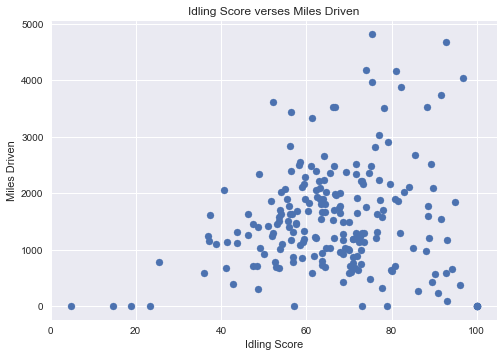

In [41]:
#Miles Driven verses Idling Score
figMDIS=plt.figure()

ax=figMDIS.add_subplot(1,1,1)
ax.scatter(driverBehavior['Idling Score'],driverBehavior['Miles'])

plt.title('Idling Score verses Miles Driven')
plt.xlabel('Idling Score')
plt.ylabel('Miles Driven')
plt.show()


As we can see in the below graph, there's a slight positive correlation here. Nothing to write home about, but we expected the opposite. 

[[ 1.          0.11920781]
 [ 0.11920781  1.        ]]


C:\Users\jmiller\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


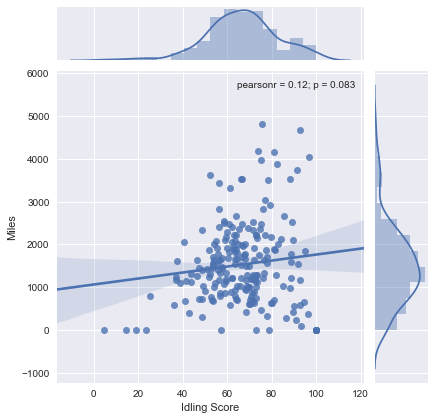

In [55]:
#Correlation between Miles and Idle
print (np.corrcoef(driverBehavior['Idling Score'], driverBehavior['Miles']))
sb.jointplot(x="Idling Score", y="Miles", data=driverBehavior, kind="reg")
plt.show()

Let's see if idling and aggressive behaviors are linked. This would show that there are "bad drivers" just in general: 

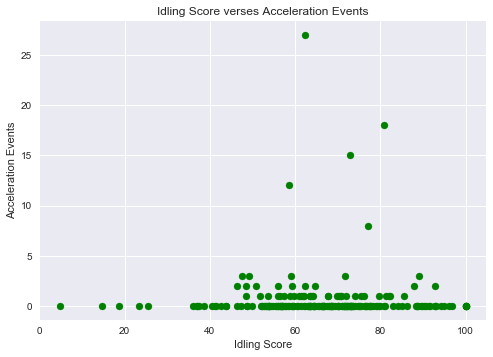

In [51]:
#Idling vs Acceleration
figIA=plt.figure()

ax=figIA.add_subplot(1,1,1)
ax.scatter(driverBehavior['Idling Score'],driverBehavior['Acceleration'], color='green')

plt.title('Idling Score verses Acceleration Events')
plt.xlabel('Idling Score')
plt.ylabel('Acceleration Events')
plt.show()

Let's use a swarmplot to get a better view of all the drivers who had no rapid acceleration or braking events: 

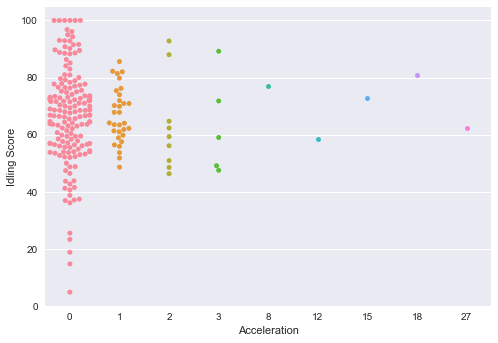

In [47]:
#:::Swarmplot of Acceleration vs Idling
sb.swarmplot(x="Acceleration", y="Idling Score", data=driverBehavior)
plt.show()


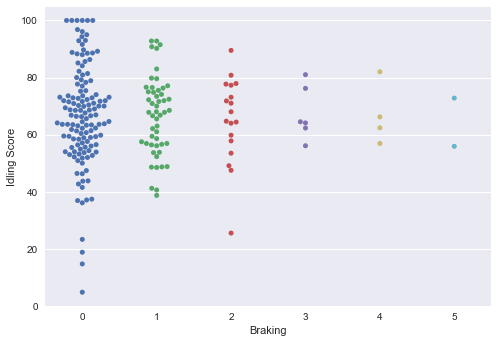

In [52]:
#Idling vs. Braking Regression
sb.swarmplot(x="Braking", y="Idling Score", data=driverBehavior)
plt.show()

Now we'll look at miles and aggresson score. Does driving more cause an increase in aggression events? One could use the logic that simply increasing the amount of time on the road increases the chance you will get into a driver safety event. 

[[ 1.        0.093619]
 [ 0.093619  1.      ]]


C:\Users\jmiller\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


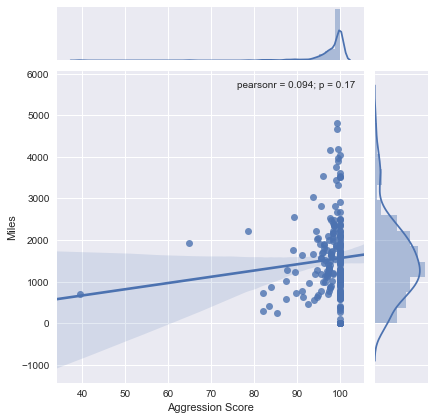

In [54]:
#Correlation between Miles and Aggression
print (np.corrcoef(driverBehavior['Aggression Score'], driverBehavior['Miles']))
sb.jointplot(x="Aggression Score", y="Miles", data=driverBehavior, kind="reg")
plt.show()

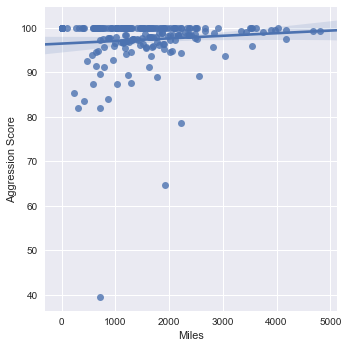

In [57]:
#Aggression vs. Miles Driven
sb.lmplot(x="Miles", y="Aggression Score", data=driverBehavior)
plt.show()

Here's the strongest interesting correlation- the link between acceleration and braking events. This would imply that people who rack up rapid acceleration events also tend to have hard braking events. This isn't the strongest correlation, though. 

[[ 1.          0.36878538]
 [ 0.36878538  1.        ]]


C:\Users\jmiller\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


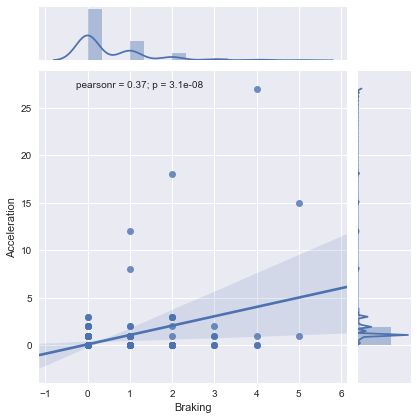

In [58]:
#Correlation between Braking and Acceleration
print (np.corrcoef(driverBehavior['Braking'], driverBehavior['Acceleration']))
sb.jointplot(x="Braking", y="Acceleration", data=driverBehavior, kind="reg")
plt.show()
